In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("28_08_2024_18.23.16/log_28_08_2024_18.23.16.csv")


In [4]:
data.head()

,windowSize,probOfBadChannel,probOfBadNACK,probOfGoodNACK,packetCount,expected,frequency
0,2,0.01,0.7,0.01,100,0.000000,"{(0, 0): 49}"
1,2,0.01,0.7,0.01,1000,0.082677,"{(0, 0): 481, (1, 0): 5, (-1, 0): 4, (1, 1): 3..."
2,2,0.01,0.7,0.01,10000,0.081697,"{(0, 0): 4791, (0, 1): 57, (0, -1): 54, (1, 1)..."
3,2,0.01,0.7,0.01,100000,0.068482,"{(0, 0): 48101, (1, 0): 580, (-1, 0): 573, (0,..."
4,2,0.01,0.7,0.01,1000000,0.074450,"{(0, 0): 479553, (1, 0): 5953, (-1, 0): 5863, ..."


In [5]:
x = data.groupby(["windowSize","probOfBadChannel"]).agg({"expected":"mean"})

In [6]:
# List of probabilities to filter
probabilities = [0.01, 0.02, 0.05, 0.1, 0.2]

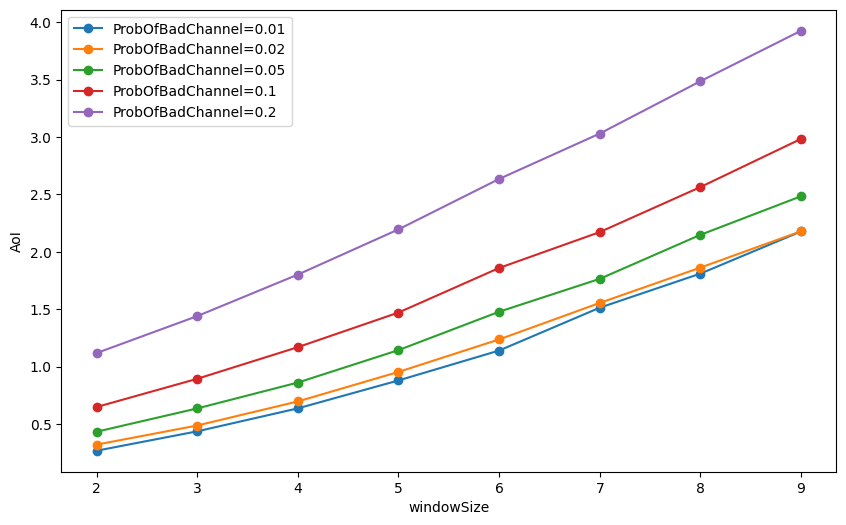

In [21]:
# Plotting
plt.figure(figsize=(10, 6))

for prob in probabilities:
    filtered_x = x.loc[x.index.get_level_values("probOfBadChannel") == prob]
    plt.plot(filtered_x.index.get_level_values("windowSize"), filtered_x["expected"], marker='o', label=f'ProbOfBadChannel={prob}')

plt.xlabel("windowSize")
plt.ylabel("AoI")
plt.legend()
plt.savefig('AoI_windowSize.png')

plt.show()

In [8]:
y = data.groupby(["probOfBadChannel","windowSize"]).agg({"expected":"mean"})

In [9]:
windowSizes = [2,3,4,5,6,7,8,9]

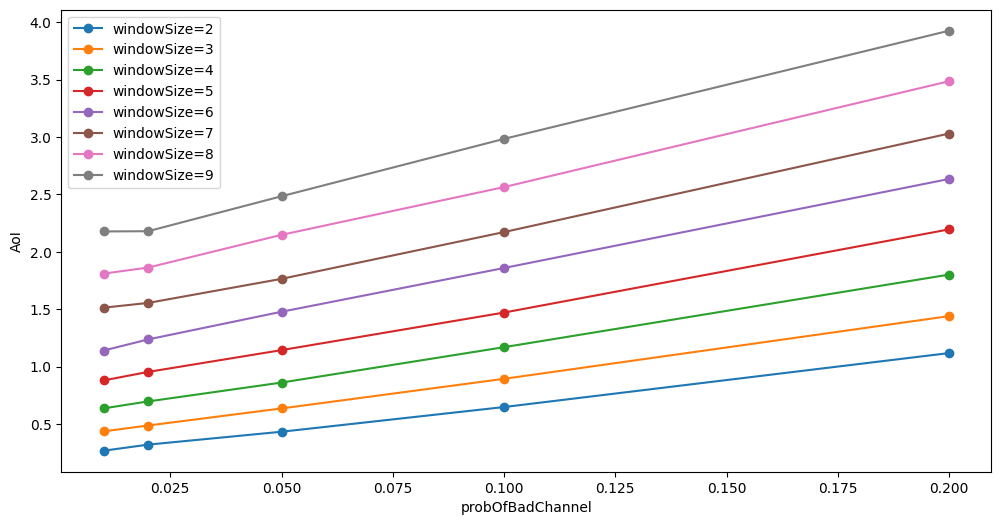

In [10]:
# Plotting
plt.figure(figsize=(12, 6))

for size in windowSizes:
    filtered_y = y.loc[y.index.get_level_values("windowSize") == size]
    plt.plot(filtered_y.index.get_level_values("probOfBadChannel"), filtered_y["expected"], marker='o', label=f'windowSize={size}')

plt.xlabel("probOfBadChannel")
plt.ylabel("AoI")
plt.legend()
plt.savefig('AoI_probOfBadChannel.png')

plt.show()

In [13]:
import seaborn as sns
import pandas as pd

def plot_heatmap_expected_aoi(df):
    """
    Creates a heatmap of Expected AoI with windowSize and probOfBadChannel as axes.
    
    Args:
    - df: DataFrame containing columns ['windowSize', 'probOfBadChannel', 'expected']
    """
    heatmap_data = df.pivot_table(values='expected', index='windowSize', columns='probOfBadChannel')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f")
    plt.xlabel('Probability of Bad Channel')
    plt.ylabel('Window Size')
    plt.title('Heatmap of Expected AoI')
    plt.savefig('AoI_windowSize_Heatmap.png')
    plt.show()


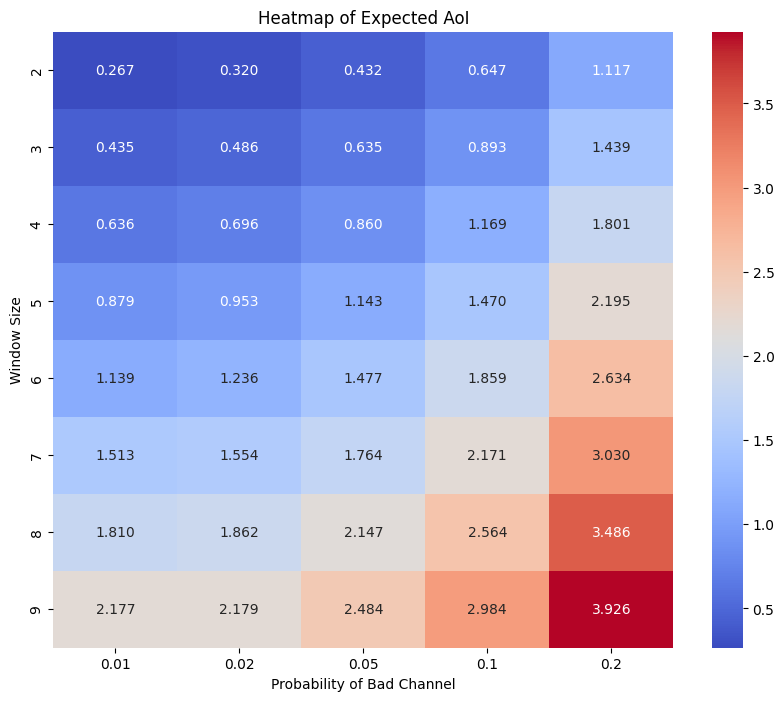

In [14]:
plot_heatmap_expected_aoi(data)

In [15]:
import seaborn as sns
import pandas as pd

def plot_boxplot_aoi_distribution(df):
    """
    Creates a box plot to compare AoI distribution across different parameter settings.
    
    Args:
    - df: DataFrame containing columns ['windowSize', 'probOfBadChannel', 'AoI'] where 'AoI' represents individual AoI values.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='windowSize', y='expected', hue='probOfBadChannel', data=df)
    plt.xlabel('Window Size')
    plt.ylabel('AoI')
    plt.title('Box Plot of AoI Distribution Across Parameter Settings')
    plt.legend(title='Prob. of Bad Channel')
    plt.grid(True)
    plt.savefig('AoI_windowSize_BoxPlot.png')
    plt.show()


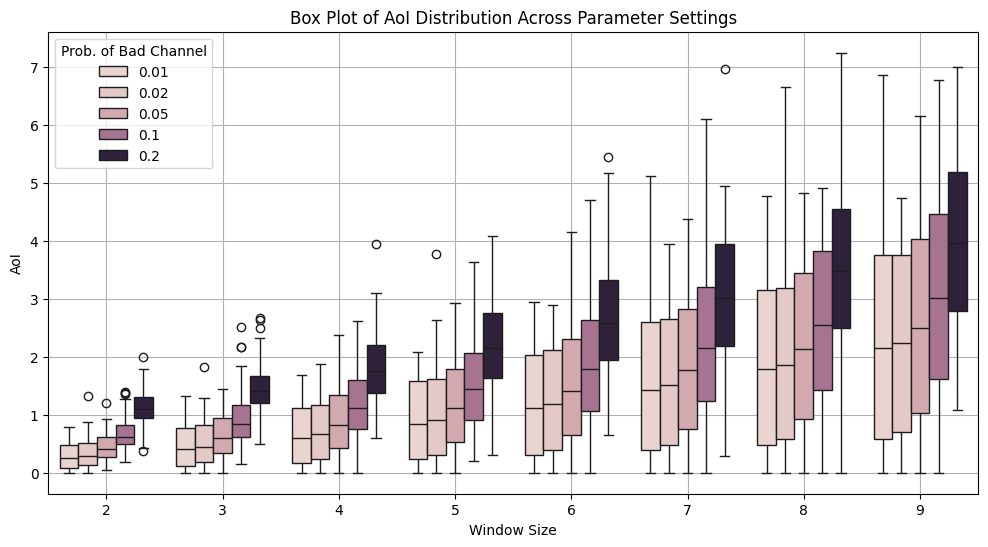

In [16]:
plot_boxplot_aoi_distribution(data)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_with_regression(df, x_param, y_param='expected'):
    """
    Creates a scatter plot with a regression line for Expected AoI against a parameter.
    
    Args:
    - df: DataFrame containing columns for x_param and 'expected' AoI.
    - x_param: The column name to be plotted on the x-axis (e.g., 'probOfBadChannel').
    - y_param: The column name to be plotted on the y-axis. Default is 'expected'.
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_param, y=y_param, data=df, scatter_kws={"s": 50}, line_kws={"color": "red"})
    plt.xlabel(x_param)
    plt.ylabel('Expected AoI')
    plt.title(f'Scatter Plot of {y_param} vs. {x_param}')
    plt.grid(True)
    plt.savefig('AoI_windowSize_ScatterPlot.png')
    plt.show()


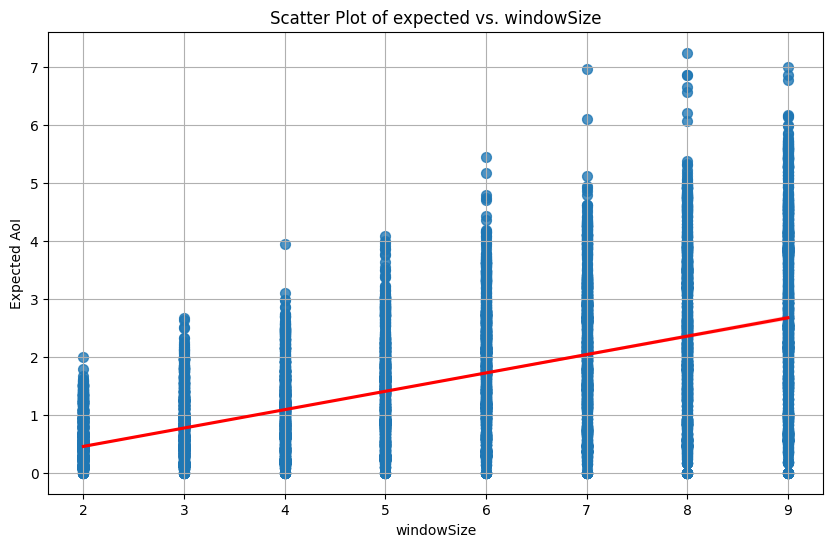

In [22]:
plot_scatter_with_regression(data,"windowSize")

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_surface_aoi(df):
    """
    Creates a 3D surface plot of Expected AoI as a function of windowSize and probOfBadChannel.
    
    Args:
    - df: DataFrame containing columns ['windowSize', 'probOfBadChannel', 'expected']
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    X = df['windowSize'].values
    Y = df['probOfBadChannel'].values
    Z = df['expected'].values
    
    ax.plot_trisurf(X, Y, Z, cmap='viridis')
    
    ax.set_xlabel('Window Size')
    ax.set_ylabel('Probability of Bad Channel')
    ax.set_zlabel('Expected AoI')
    ax.set_title('3D Surface Plot of Expected AoI')
    plt.savefig('AoI_windowSize_3D.png')
    plt.show()


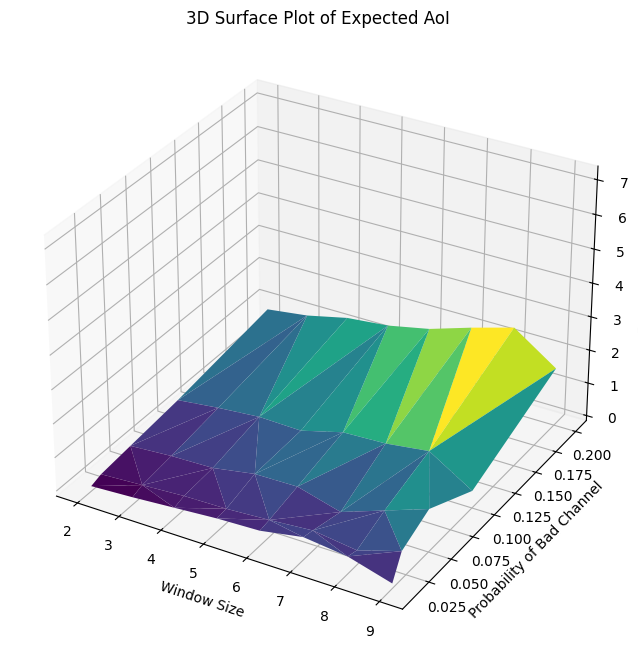

In [20]:
plot_3d_surface_aoi(data)